In [1]:
import jieba
import jieba.analyse
import pandas
import re
import matplotlib.pyplot

權重前100
   word    TF-IDF
0    什麼  0.194645
1    八卦  0.194205
2    台灣  0.120814
3    怎麼  0.111867
4    肥宅  0.073366
..  ...       ...
95   不過  0.007350
96   一直  0.007303
97   ..  0.007249
98  ptt  0.007110
99   最強  0.006979

[100 rows x 2 columns]


AttributeError: 'Rectangle' object has no property 'xlabel'

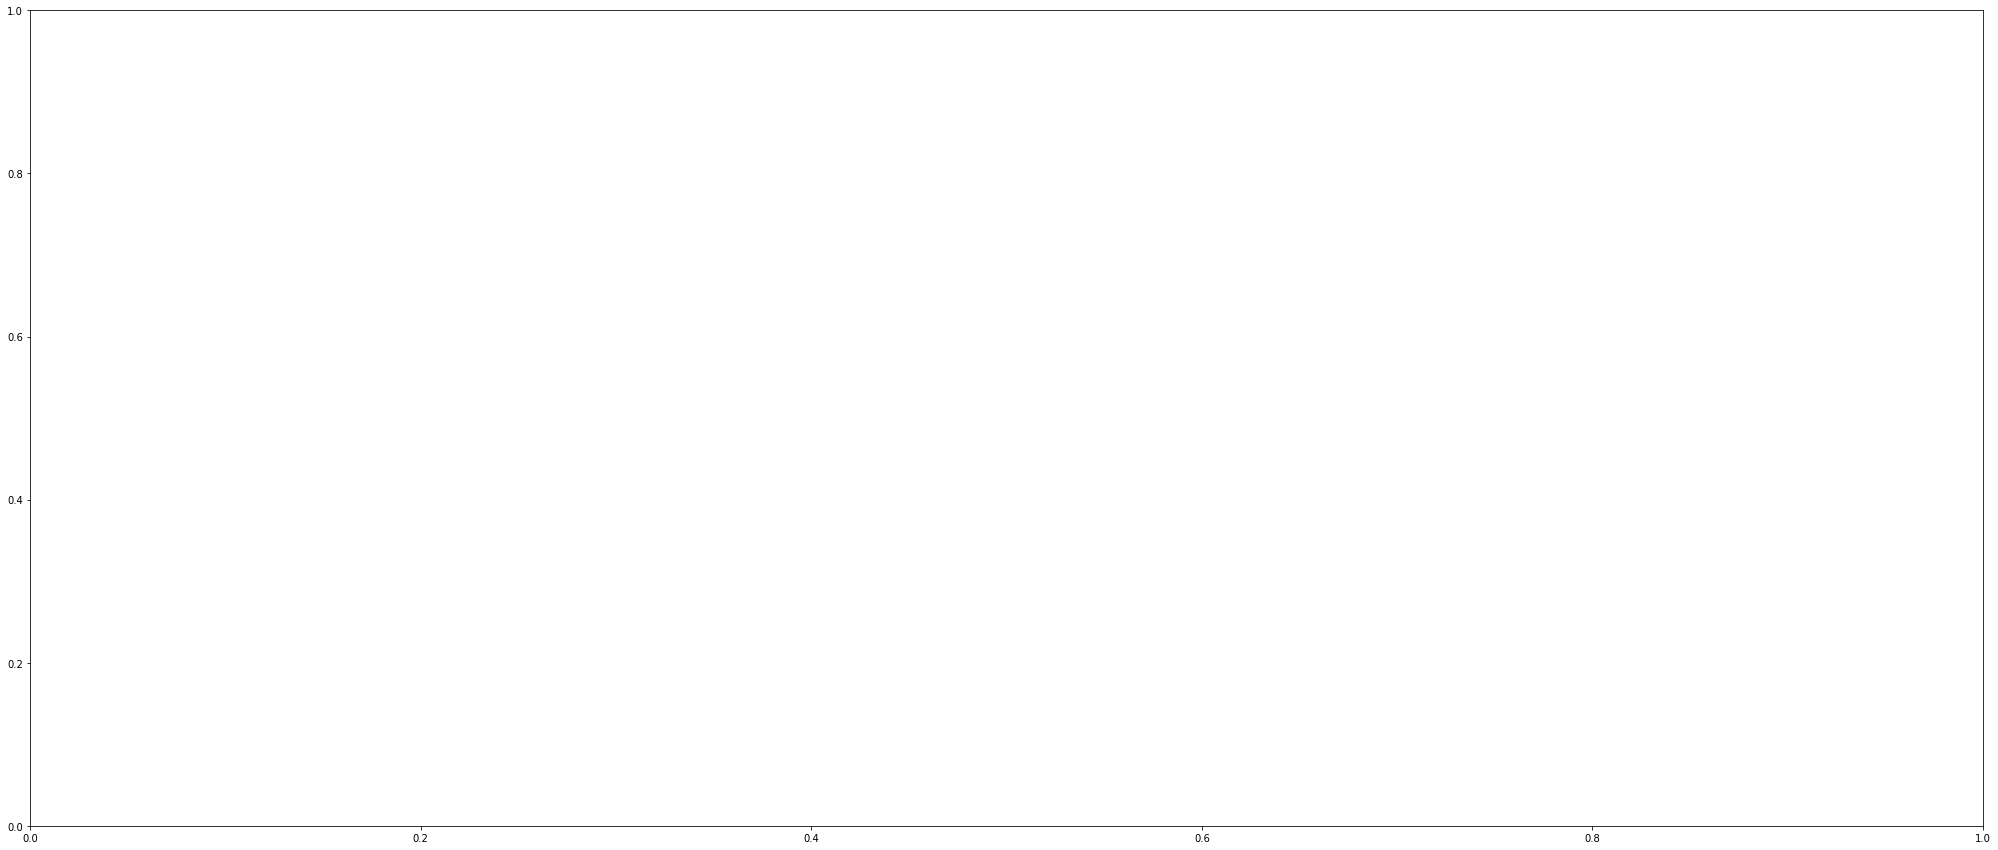

In [14]:
def TF_IDF():
    txt = open("HW01.txt", encoding="utf-8").read()
    tags=jieba.analyse.extract_tags(txt, topK=100, withWeight=True)
    
    DF=pandas.DataFrame(tags, columns = ["word","TF-IDF"])
    print('權重前100')
    print(DF)
    chart = DF.plot(kind ='bar',
                    title = 'word/TF-IDF',
                    xlabel = 'word',
                    ylabel = 'TF-IDF',
                    figsize = (35,15))
    matplotlib.pyplot.show()
    
def Frequency():
    seg_word = ""
    txt = open("HW01.txt", encoding="utf-8").read()
    ch = re.compile("[\u4e00-\u9fa5]")
    seg_word = "".join(ch.findall(txt))
    cut = jieba.lcut(seg_word)

    times = {}
    for i in cut:
        if(len(i)>1):
            times[i]=times.get(i,0)+1
            
    items = list(times.item())
    items.sort(key = lambda x:x[1], reverse = True)
    
    for i in range(100):
        word,times = items[i]
        
    DF = pandas.DataFrame(items, columns = ["word","frequency"]).sort_values(['frequency'], ascending= [False])[0:100]
    print('頻率前100名的字詞')
    print(DF)
    chart=DF.plot(kind = 'bar',title = 'word/frequency', xlabel = 'word', ylabel='frequency', figsize=(35,15))
    matplotlib.pyplot.show

TF_IDF()
Frequency()


